In [228]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score, mean_absolute_error

## Regrssion Modeling:

In [2]:
df = pd.read_csv("D://stage_ete_SDC_data/data_store_warp/dataframes/data634.csv")

In [3]:
df.head()

,frame_id,mask_id,row_number,pixel_number,label
0,634,634,0,88,1.0
1,634,634,0,88,1.0
2,634,634,0,88,1.0
3,634,634,0,91,1.0
4,634,634,0,91,1.0


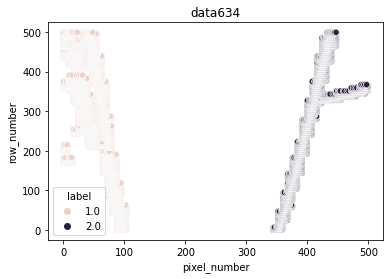

In [4]:
sns.scatterplot(data=df, x="pixel_number", y="row_number", hue="label")
plt.title("data634")
plt.show()

In [5]:
## Reggression fro the left line
df_left = df.loc[df.label == 1].copy()

## Splitting into train and test
X = df_left.iloc[:,:-2]
y = df_left.iloc[:,-2]



X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.3, random_state=42)

In [6]:
## Calling the model and training it
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [7]:
## Testing and evaluating the model
y_pred = model.predict(X_test)

print(f"R squarred : {r2_score(y_test, y_pred)}")
print(f"Mean squarred error : {mean_squared_error(y_test, y_pred)}")
print(f"Training score : {model.score(X_train, y_train)}")

R squarred : 0.536700071444725
Mean squarred error : 310.4022013753749
Training score : 0.5512445860216133


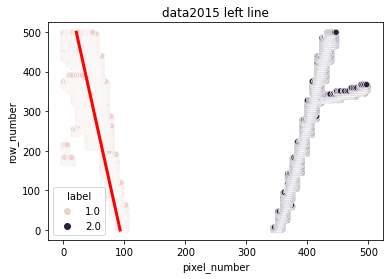

In [8]:
##plotting the model
y_pred = model.predict(X)
sns.scatterplot(data=df, x="pixel_number", y="row_number", hue="label")
plt.plot(y_pred, df_left['row_number'], color="red", linewidth=3)
plt.title("data2015 left line")
plt.show()

In [9]:
## Reggression fro the left line
df_right = df.loc[df.label == 2].copy()

## Splitting into train and test
X = df_right.iloc[:,:-2]
y = df_right.iloc[:,-2]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.3, random_state=42)

In [10]:
## Calling the model and training it
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [11]:
## Testing and evaluating the model
y_pred = model.predict(X_test)

print(f"R squarred : {r2_score(y_test, y_pred)}")
print(f"Mean squarred error : {mean_squared_error(y_test, y_pred)}")
print(f"Training score : {model.score(X_train, y_train)}")

R squarred : 0.6431892163498287
Mean squarred error : 387.6258188098415
Training score : 0.6556276835121804


19377
19377


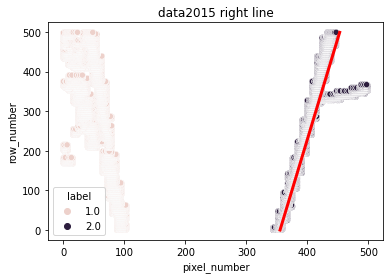

In [12]:
##plotting the model
y_pred = model.predict(X)

print(len(y_pred))
    
print(len(df_right['row_number']))
sns.scatterplot(data=df, x="pixel_number", y="row_number", hue="label")
plt.plot(y_pred, df_right['row_number'], color="red", linewidth=3)
plt.title("data2015 right line")
plt.show()

## Left and right lines plotting

### 1) Right turn:

In [13]:
def modelPredict(df_lineDirection):
    X = df_lineDirection.iloc[:,:-2]
    y = df_lineDirection.iloc[:,-2]
    
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.3, random_state=42)
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)

    print(f"R squarred : {r2_score(y_test, y_pred)}")
    print(f"Mean squarred error : {mean_squared_error(y_test, y_pred)}")
    print(f"Training score : {model.score(X_train, y_train)}")
    
    return model

In [14]:
def regression(model, df_lineDirection):
    X = df_lineDirection.iloc[:,:-2]
    y_pred = model.predict(X)
    
    return y_pred

In [15]:
def regression_test(model, df_lineDirection):
    X = df_lineDirection
    y_pred = model.predict(X)
    
    return y_pred

In [16]:
def plottingCurves(y_left, y_right, df_left, df_right):
    sns.scatterplot(data=df, x="pixel_number", y="row_number", hue="label")
    plt.plot(y_left, df_left['row_number'], color="red", linewidth=3)
    plt.plot(y_right, df_right['row_number'], color="green", linewidth=3)
    plt.title("data lines regression")
    plt.show()

R squarred : 0.536700071444725
Mean squarred error : 310.4022013753749
Training score : 0.5512445860216133
R squarred : 0.6431892163498287
Mean squarred error : 387.6258188098415
Training score : 0.6556276835121804


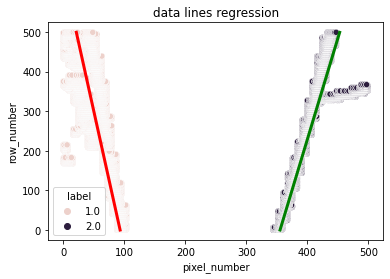

In [17]:
model_left = modelPredict(df.loc[df.label == 1].copy())
model_right = modelPredict(df.loc[df.label == 2].copy())

left_reg = regression(model_left, df.loc[df.label == 1].copy())
right_reg = regression(model_right, df.loc[df.label == 2].copy())

plottingCurves(left_reg, right_reg, df.loc[df.label == 1].copy(), df.loc[df.label == 2].copy())

## Curve plotting:

In [18]:
frame_id = 634
mask_id = frame_id
df_test = pd.DataFrame(
    {
        "frame_id" : [frame_id]*500,
        "mask_id" : [mask_id]*500,
        "row_number": list(range(500))
    }
)

In [19]:
df_test

,frame_id,mask_id,row_number
0,634,634,0
1,634,634,1
2,634,634,2
3,634,634,3
4,634,634,4
...,...,...,...
495,634,634,495
496,634,634,496
497,634,634,497
498,634,634,498


In [20]:
def line_intersection(line1, line2):
    xdiff = (line1[0][0] - line1[1][0], line2[0][0] - line2[1][0])
    ydiff = (line1[0][1] - line1[1][1], line2[0][1] - line2[1][1])

    def det(a, b):
        return a[0] * b[1] - a[1] * b[0]

    div = det(xdiff, ydiff)
    if div == 0:
       raise Exception('lines do not intersect')

    d = (det(*line1), det(*line2))
    x = det(d, xdiff) / div
    y = det(d, ydiff) / div
    return x, y

In [21]:
def plottingCurvesMiddel(y_left, y_right, df_left, df_right):
    
    y_same = line_intersection(((left_reg_test[0], 0), (left_reg_test[-1], 499)), ((right_reg_test[0], 0), (right_reg_test[-1], 499)))
    
    y_base_mid = (y_left[499] + y_right[499])/2
    print(y_same)
    y_middle = (y_left + y_right)/2
    print((y_middle[-1], 499))
    sns.scatterplot(data=df, x="pixel_number", y="row_number", hue="label")
    plt.plot(y_left, df_left['row_number'], color="red", linewidth=3)
    plt.plot(y_right, df_right['row_number'], color="green", linewidth=3)
    plt.plot(y_middle, df_right['row_number'], color="black", linewidth=3)
    plt.title("data lines regression")
    plt.show()

In [22]:
left_reg_test = regression_test(model_left, df_test)
right_reg_test = regression_test(model_right, df_test)

(203.89014593192866, -771.7322979450485)
(236.98865633106362, 499)


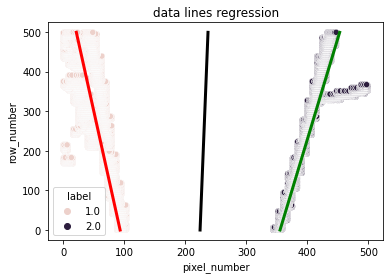

In [23]:
plottingCurvesMiddel(left_reg_test, right_reg_test, df_test, df_test)

In [24]:
df = pd.read_csv("D:/stage_ete_SDC_data/data_store_warp/mean_dataframes/new_data200.csv")

In [25]:
df.head()

,frame_id,mask_id,row_number,pixel_number,label
0,200,200,0,48.333333,1.0
1,200,200,1,48.571429,1.0
2,200,200,2,48.820000,1.0
3,200,200,3,48.714286,1.0
4,200,200,4,48.714286,1.0


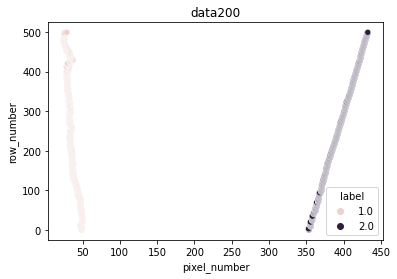

In [26]:
sns.scatterplot(data=df, x="pixel_number", y="row_number", hue="label")
plt.title("data200")
plt.show()

In [27]:
# model_left = modelPredict(df.loc[df.label == 1].copy())
# model_right = modelPredict(df.loc[df.label == 2].copy())

# left_reg = regression(model_left, df.loc[df.label == 1].copy())
# right_reg = regression(model_right, df.loc[df.label == 2].copy())

# plottingCurves(left_reg, right_reg, df.loc[df.label == 1].copy(), df.loc[df.label == 2].copy())

## Curve plotting:

In [28]:
frame_id = 200
mask_id = frame_id
df_test = pd.DataFrame(
    {
        "frame_id" : [frame_id]*500,
        "mask_id" : [mask_id]*500,
        "row_number": list(range(500))
    }
)

In [29]:
df_test

,frame_id,mask_id,row_number
0,200,200,0
1,200,200,1
2,200,200,2
3,200,200,3
4,200,200,4
...,...,...,...
495,200,200,495
496,200,200,496
497,200,200,497
498,200,200,498


In [30]:
left_reg_test = regression_test(model_left, df_test)
right_reg_test = regression_test(model_right, df_test)

(203.89014593192866, -771.7322979450485)
(236.98865633106362, 499)


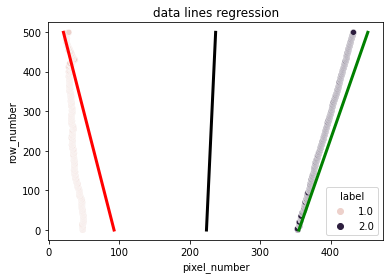

In [31]:
plottingCurvesMiddel(left_reg_test, right_reg_test, df_test, df_test)

## SVR Regression

### SVR (mean_dataframe)

In [32]:
from sklearn.svm import SVR

In [75]:
df = pd.read_csv("D:/stage_ete_SDC_data/data_store_warp/mean_dataframes/new_data200.csv")

In [76]:
df.head()

,frame_id,mask_id,row_number,pixel_number,label
0,200,200,0,48.333333,1.0
1,200,200,1,48.571429,1.0
2,200,200,2,48.820000,1.0
3,200,200,3,48.714286,1.0
4,200,200,4,48.714286,1.0


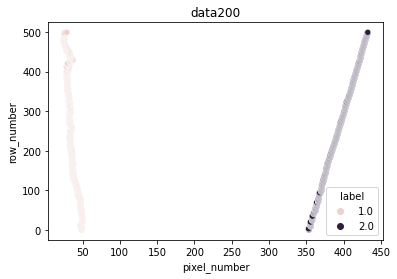

In [77]:
sns.scatterplot(data=df, x="pixel_number", y="row_number", hue="label")
plt.title("data200")
plt.show()

In [78]:
def line_intersection(line1, line2):
    xdiff = (line1[0][0] - line1[1][0], line2[0][0] - line2[1][0])
    ydiff = (line1[0][1] - line1[1][1], line2[0][1] - line2[1][1])

    def det(a, b):
        return a[0] * b[1] - a[1] * b[0]

    div = det(xdiff, ydiff)
    if div == 0:
       raise Exception('lines do not intersect')

    d = (det(*line1), det(*line2))
    x = det(d, xdiff) / div
    y = det(d, ydiff) / div
    return x, y

In [79]:
def plottingCurvesMiddel(y_left, y_right, df_left, df_right):
    
    y_same = line_intersection(((left_reg_test[0], 0), (left_reg_test[-1], 499)), ((right_reg_test[0], 0), (right_reg_test[-1], 499)))
    
    y_base_mid = (y_left[499] + y_right[499])/2
    print(y_same)
    y_middle = (y_left + y_right)/2
    print((y_middle[-1], 499))
    print((y_middle[0], 0))
    sns.scatterplot(data=df, x="pixel_number", y="row_number", hue="label")
    plt.plot(y_left, df_left['row_number'], color="red", linewidth=3)
    plt.plot(y_right, df_right['row_number'], color="green", linewidth=3)
    plt.plot(y_middle, df_right['row_number'], color="black", linewidth=3)
    plt.title("data lines regression")
    plt.show()

In [80]:
## Reggression fro the left line
df_right = df.loc[df.label == 2].copy()

## Splitting into train and test
X = df_right.iloc[:,:-2]
y = df_right.iloc[:,-2]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.3, random_state=42)

In [81]:
svr_model = SVR(kernel="poly")

In [82]:
svr_model.fit(X_train, y_train)

SVR(kernel='poly')

In [83]:

y_pred = svr_model.predict(X_test)

print(f"R squarred : {r2_score(y_test, y_pred)}")
print(f"Mean squarred error : {mean_squared_error(y_test, y_pred)}")
print(f"Training score : {svr_model.score(X_train, y_train)}")

R squarred : 0.9996192741239714
Mean squarred error : 0.2295595028479518
Training score : 0.9995578378195195


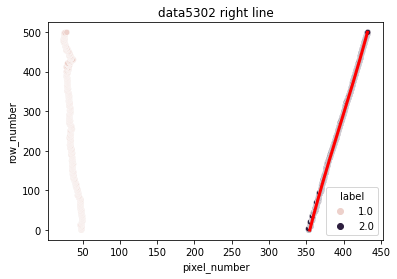

In [84]:
y_pred = svr_model.predict(X)
sns.scatterplot(data=df, x="pixel_number", y="row_number", hue="label")
plt.plot(y_pred, df_right['row_number'], color="red", linewidth=3)
plt.title("data5302 right line")
plt.show()

In [91]:
frame_id = 200
mask_id = frame_id
df_test = pd.DataFrame(
    {
        "frame_id" : [frame_id]*500,
        "mask_id" : [mask_id]*500,
        "row_number": list(range(500))
    }
)

In [92]:
def modelPredict(df_lineDirection):
    X = df_lineDirection.iloc[:,:-2]
    y = df_lineDirection.iloc[:,-2]
    
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.3, random_state=42)
    model = SVR(kernel="rbf")
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)

    print(f"R squarred : {r2_score(y_test, y_pred)}")
    print(f"Mean squarred error : {mean_squared_error(y_test, y_pred)}")
    print(f"Training score : {model.score(X_train, y_train)}")
    
    return model

In [93]:
def regression_test(model, df_lineDirection):
    X = df_lineDirection
    y_pred = model.predict(X)
    
    return y_pred

In [94]:
model_left = modelPredict(df.loc[df.label == 1].copy())
model_right = modelPredict(df.loc[df.label == 2].copy())

R squarred : 0.9507560012476883
Mean squarred error : 2.7214191533272687
Training score : 0.9340101828362071
R squarred : 0.9837007261788187
Mean squarred error : 9.827682936089072
Training score : 0.9880445855662825


In [95]:
left_reg_test = regression_test(model_left, df_test)
right_reg_test = regression_test(svr_model, df_test)

(112.43479314459383, -1564.241984952792)
(230.19224223230697, 499)


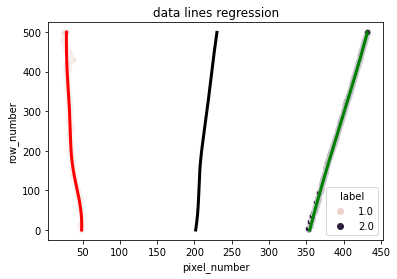

In [96]:
plottingCurvesMiddel(left_reg_test, right_reg_test, df_test, df_test)

### SVR (dataframe):

In [97]:
from sklearn.svm import SVR

In [98]:
df = pd.read_csv("D:/stage_ete_SDC_data/data_store_warp/dataframes/data200.csv")

In [99]:
df.head()

,frame_id,mask_id,row_number,pixel_number,label
0,200,200,0,20,1.0
1,200,200,0,21,1.0
2,200,200,0,22,1.0
3,200,200,0,23,1.0
4,200,200,0,24,1.0


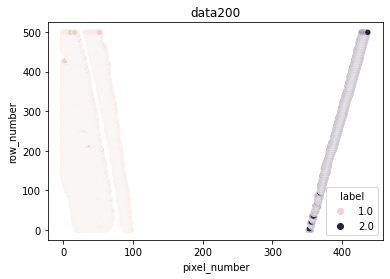

In [100]:
sns.scatterplot(data=df, x="pixel_number", y="row_number", hue="label")
plt.title("data200")
plt.show()

In [101]:
def line_intersection(line1, line2):
    xdiff = (line1[0][0] - line1[1][0], line2[0][0] - line2[1][0])
    ydiff = (line1[0][1] - line1[1][1], line2[0][1] - line2[1][1])

    def det(a, b):
        return a[0] * b[1] - a[1] * b[0]

    div = det(xdiff, ydiff)
    if div == 0:
       raise Exception('lines do not intersect')

    d = (det(*line1), det(*line2))
    x = det(d, xdiff) / div
    y = det(d, ydiff) / div
    return x, y

In [102]:
def plottingCurvesMiddel(y_left, y_right, df_left, df_right):
    
    y_same = line_intersection(((left_reg_test[0], 0), (left_reg_test[-1], 499)), ((right_reg_test[0], 0), (right_reg_test[-1], 499)))
    
    y_base_mid = (y_left[499] + y_right[499])/2
    print(y_same)
    y_middle = (y_left + y_right)/2
    print((y_middle[-1], 499))
    print((y_middle[0], 0))
    sns.scatterplot(data=df, x="pixel_number", y="row_number", hue="label")
    plt.plot(y_left, df_left['row_number'], color="red", linewidth=3)
    plt.plot(y_right, df_right['row_number'], color="green", linewidth=3)
    plt.plot(y_middle, df_right['row_number'], color="black", linewidth=3)
    plt.title("data lines regression")
    plt.show()

In [103]:
## Reggression fro the left line
df_right = df.loc[df.label == 2].copy()

## Splitting into train and test
X = df_right.iloc[:,:-2]
y = df_right.iloc[:,-2]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.3, random_state=42)

In [104]:
svr_model = SVR(kernel="poly")

In [105]:
svr_model.fit(X_train, y_train)

SVR(kernel='poly')

In [106]:

y_pred = svr_model.predict(X_test)

print(f"R squarred : {r2_score(y_test, y_pred)}")
print(f"Mean squarred error : {mean_squared_error(y_test, y_pred)}")
print(f"Training score : {svr_model.score(X_train, y_train)}")

R squarred : 0.9899734769289347
Mean squarred error : 4.424986510475769
Training score : 0.9894850785871292


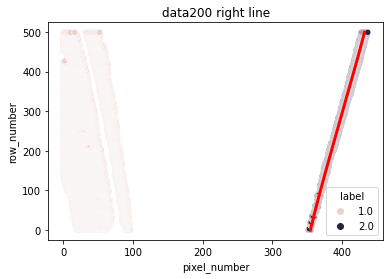

In [107]:
y_pred = svr_model.predict(X)
sns.scatterplot(data=df, x="pixel_number", y="row_number", hue="label")
plt.plot(y_pred, df_right['row_number'], color="red", linewidth=3)
plt.title("data200 right line")
plt.show()

In [108]:
frame_id = 200
mask_id = frame_id
df_test = pd.DataFrame(
    {
        "frame_id" : [frame_id]*500,
        "mask_id" : [mask_id]*500,
        "row_number": list(range(500))
    }
)

In [109]:
def modelPredict(df_lineDirection):
    X = df_lineDirection.iloc[:,:-2]
    y = df_lineDirection.iloc[:,-2]
    
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.3, random_state=42)
    model = SVR(kernel="rbf")
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)

    print(f"R squarred : {r2_score(y_test, y_pred)}")
    print(f"Mean squarred error : {mean_squared_error(y_test, y_pred)}")
    print(f"Training score : {model.score(X_train, y_train)}")
    
    return model

In [110]:
def regression_test(model, df_lineDirection):
    X = df_lineDirection
    y_pred = model.predict(X)
    
    return y_pred

In [111]:
model_left = modelPredict(df.loc[df.label == 1].copy())
model_right = modelPredict(df.loc[df.label == 2].copy())

R squarred : 0.039221709079989786
Mean squarred error : 524.2059499153884
Training score : 0.05436120395490984
R squarred : 0.989040142510373
Mean squarred error : 4.836893228550043
Training score : 0.9880307589853591


In [112]:
left_reg_test = regression_test(model_left, df_test)
right_reg_test = regression_test(svr_model, df_test)

(115.14087606942527, -1536.2567665764668)
(226.325731777485, 499)


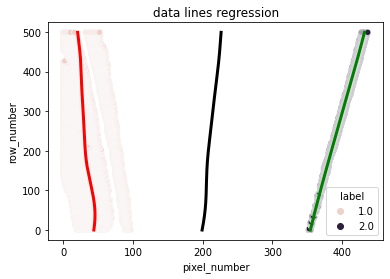

In [113]:
plottingCurvesMiddel(left_reg_test, right_reg_test, df_test, df_test)

### SVR Regression (AE):

### 1) Mean_Dataframe:

In [114]:
df_prev1 = pd.read_csv("D:/stage_ete_SDC_data/data_store_warp/mean_dataframes/new_data198.csv")
df_prev2 = pd.read_csv("D:/stage_ete_SDC_data/data_store_warp/mean_dataframes/new_data199.csv")
df_curr = pd.read_csv("D:/stage_ete_SDC_data/data_store_warp/mean_dataframes/new_data200.csv")

In [115]:
df_prev1.head()

,frame_id,mask_id,row_number,pixel_number,label
0,198,198,0,50.796296,1.0
1,198,198,1,50.452830,1.0
2,198,198,2,49.692308,1.0
3,198,198,3,49.692308,1.0
4,198,198,4,49.333333,1.0


In [116]:
df_prev2.head()

,frame_id,mask_id,row_number,pixel_number,label
0,199,199,0,50.351852,1.0
1,199,199,1,50.037736,1.0
2,199,199,2,49.269231,1.0
3,199,199,3,48.941176,1.0
4,199,199,4,49.269231,1.0


In [117]:
df_curr.head()

,frame_id,mask_id,row_number,pixel_number,label
0,200,200,0,48.333333,1.0
1,200,200,1,48.571429,1.0
2,200,200,2,48.820000,1.0
3,200,200,3,48.714286,1.0
4,200,200,4,48.714286,1.0


In [118]:
df_prev1["label"].value_counts()

1.0    500
2.0    495
Name: label, dtype: int64

In [119]:
df_prev2["label"].value_counts()

1.0    500
2.0    493
Name: label, dtype: int64

In [120]:
df_curr["label"].value_counts()

1.0    500
2.0    485
Name: label, dtype: int64

<p>
    The number of pixels in the right line is <b>decreasing</b>. To deal with the shortage of data, we must:
    <ul>
        <li><u><b>If the shortage is on the next dataframe</b>:</u> We replace the <i>NaN</i> values with the value before it on the column.</li>
        <li><u><b>If the shortage is on the previous dataframe</b>:</u> We dorp the row with the <i>NaN</i> value.</li>
    </ul>
</p>

In [255]:
df_prev = df_prev2.join(df_prev1.iloc[:,-3:].set_index('row_number'), on='row_number', rsuffix="_prev")

In [256]:
df_prev.isna().sum()

frame_id             0
mask_id              0
row_number           0
pixel_number         0
label                0
pixel_number_prev    0
label_prev           0
dtype: int64

In [257]:
df_prev = df_prev[df_prev['label'] == df_prev['label_prev']]

In [258]:
df_prev.head()

,frame_id,mask_id,row_number,pixel_number,label,pixel_number_prev,label_prev
0,199,199,0,50.351852,1.0,50.796296,1.0
1,199,199,1,50.037736,1.0,50.452830,1.0
2,199,199,2,49.269231,1.0,49.692308,1.0
3,199,199,3,48.941176,1.0,49.692308,1.0
4,199,199,4,49.269231,1.0,49.333333,1.0


In [259]:
df_prev["label"].value_counts()

1.0    500
2.0    493
Name: label, dtype: int64

In [260]:
def addPreviousDF(df_now, df_prev):
    df = df_now.join(df_prev.iloc[:,-3:].set_index('row_number'), on='row_number', rsuffix="_prev")
    df = df[df['label'] == df['label_prev']]
    return df

In [261]:
df_now = addPreviousDF(df_curr, df_prev2)

In [262]:
df_now.head()

,frame_id,mask_id,row_number,pixel_number,label,pixel_number_prev,label_prev
0,200,200,0,48.333333,1.0,50.351852,1.0
1,200,200,1,48.571429,1.0,50.037736,1.0
2,200,200,2,48.820000,1.0,49.269231,1.0
3,200,200,3,48.714286,1.0,48.941176,1.0
4,200,200,4,48.714286,1.0,49.269231,1.0


In [263]:
df_now["label"].value_counts()

1.0    500
2.0    485
Name: label, dtype: int64

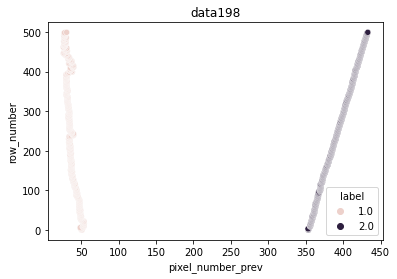

In [264]:
sns.scatterplot(data=df_prev, x="pixel_number_prev", y="row_number", hue="label")
plt.title("data198")
plt.show()

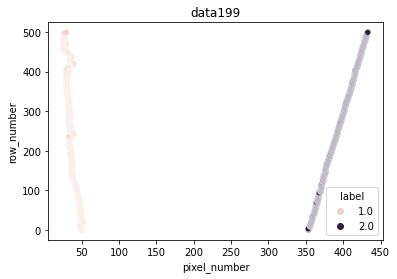

In [265]:
sns.scatterplot(data=df_prev, x="pixel_number", y="row_number", hue="label")
plt.title("data199")
plt.show()

In [266]:
## left Line model
df_left = df_prev.loc[df_prev.label == 1].copy()

X = df_left.iloc[:,[2,5]]
y = df_left.iloc[:,[3]]

In [267]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.3, random_state=42)

In [268]:
svr_ae_model_left = SVR(kernel="rbf")
svr_ae_model_left.fit(X_train, y_train)
    
y_pred = svr_ae_model_left.predict(X_test)

print(f"R squarred : {r2_score(y_test, y_pred)}")
print(f"Adjusted R squarred : {1 - (1-r2_score(y_test, y_pred)) * (len(y)-1)/(len(y)-X.shape[1]-1)}")
print(f"Mean squarred error : {mean_squared_error(y_test, y_pred)}")
print(f"Mean Absolute Error : {mean_absolute_error(y_test, y_pred)}")
print(f"Training score : {svr_ae_model_left.score(X_train, y_train)}")

R squarred : 0.933203230386923
Adjusted R squarred : 0.9329344305092043
Mean squarred error : 3.6965120664479945
Mean Absolute Error : 1.3339399867469754
Training score : 0.890740271323888


D:\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


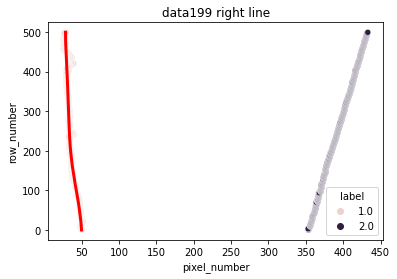

In [269]:
y_pred = svr_ae_model_left.predict(X)
sns.scatterplot(data=df_prev, x="pixel_number", y="row_number", hue="label")
plt.plot(y_pred, df_left['row_number'], color="red", linewidth=3)
plt.title("data199 right line")
plt.show()

In [270]:
df_left_now = df_now.loc[df_now.label == 1].copy()
X_now = df_left_now.iloc[:,[2,5]]

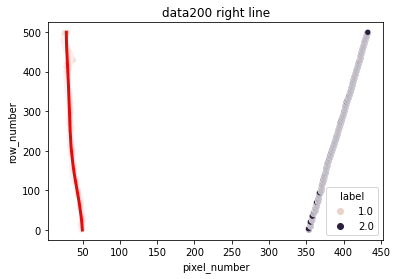

In [271]:
y_pred_now = svr_ae_model_left.predict(X_now)
sns.scatterplot(data=df_now, x="pixel_number", y="row_number", hue="label")
plt.plot(y_pred_now, df_left_now['row_number'], color="red", linewidth=3)
plt.title("data200 right line")
plt.show()

In [272]:
## Right Line model
df_right = df_prev.loc[df_prev.label == 2].copy()

X = df_right.iloc[:,[2,5]]
y = df_right.iloc[:,[3]]

In [273]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.3, random_state=42)

In [274]:
svr_ae_model_right = SVR(kernel="rbf",epsilon=)
svr_ae_model_right.fit(X_train, y_train)
    
y_pred = svr_ae_model_right.predict(X_test)

print(f"R squarred : {r2_score(y_test, y_pred)}")
print(f"Adjusted R squarred : {1 - (1-r2_score(y_test, y_pred)) * (len(y)-1)/(len(y)-X.shape[1]-1)}")
print(f"Mean squarred error : {mean_squared_error(y_test, y_pred)}")
print(f"Mean Absolute Error : {mean_absolute_error(y_test, y_pred)}")
print(f"Training score : {svr_ae_model_right.score(X_train, y_train)}")

R squarred : 0.9861582385545118
Adjusted R squarred : 0.98610174156902
Mean squarred error : 8.436809374077683
Mean Absolute Error : 1.6421754253932597
Training score : 0.989630670636532


D:\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


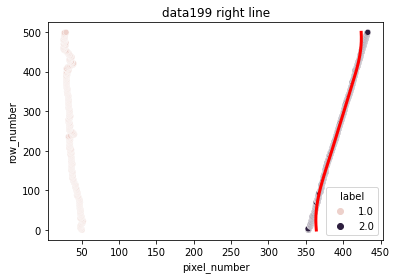

In [275]:
y_pred = svr_ae_model_right.predict(X)
sns.scatterplot(data=df_prev, x="pixel_number", y="row_number", hue="label")
plt.plot(y_pred, df_right['row_number'], color="red", linewidth=3)
plt.title("data199 right line")
plt.show()

In [276]:
df_right_now = df_now.loc[df_now.label == 2].copy()
X_now = df_right_now.iloc[:,[2,5]]

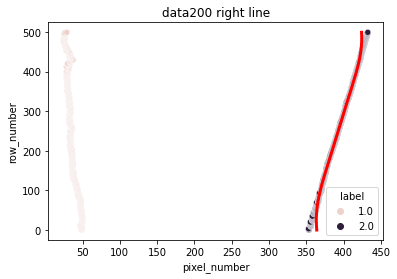

In [277]:
y_pred_now = svr_ae_model_right.predict(X_now)
sns.scatterplot(data=df_now, x="pixel_number", y="row_number", hue="label")
plt.plot(y_pred_now, df_right_now['row_number'], color="red", linewidth=3)
plt.title("data200 right line")
plt.show()

In [286]:
from sklearn.model_selection import GridSearchCV, KFold
import warnings
warnings.filterwarnings('ignore')

In [287]:
params={
    "kernel":["rbf","poly"],
    "C":[1,2,3,4,5],
    "epsilon":[.1,.2,.3,.4,.5]
}

In [288]:
X = df_left.iloc[:,[2,5]]
y = df_left.iloc[:,[3]]

In [291]:
##Left GridSearch
cv = GridSearchCV(SVR(),params, cv=KFold(n_splits=3, shuffle=True, random_state=42))
cv.fit(X,y)

GridSearchCV(cv=KFold(n_splits=3, random_state=42, shuffle=True),
             estimator=SVR(),
             param_grid={'C': [1, 2, 3, 4, 5],
                         'epsilon': [0.1, 0.2, 0.3, 0.4, 0.5],
                         'kernel': ['rbf', 'poly']})

In [292]:
cv.best_params_

{'C': 5, 'epsilon': 0.1, 'kernel': 'rbf'}

In [293]:
X = df_right.iloc[:,[2,5]]
y = df_right.iloc[:,[3]]

In [294]:
##Right GridSearch
cv = GridSearchCV(SVR(),params, cv=KFold(n_splits=3, shuffle=True, random_state=42))
cv.fit(X,y)

GridSearchCV(cv=KFold(n_splits=3, random_state=42, shuffle=True),
             estimator=SVR(),
             param_grid={'C': [1, 2, 3, 4, 5],
                         'epsilon': [0.1, 0.2, 0.3, 0.4, 0.5],
                         'kernel': ['rbf', 'poly']})

In [295]:
cv.best_params_

{'C': 4, 'epsilon': 0.2, 'kernel': 'poly'}

### 2) Grid Search:

In [296]:
## left Line model
df_left = df_prev.loc[df_prev.label == 1].copy()

X = df_left.iloc[:,[2,5]]
y = df_left.iloc[:,[3]]

In [297]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.3, random_state=42)

In [298]:
svr_ae_model_left = SVR(kernel="rbf", C=5, epsilon=.1)
svr_ae_model_left.fit(X_train, y_train)
    
y_pred = svr_ae_model_left.predict(X_test)

print(f"R squarred : {r2_score(y_test, y_pred)}")
print(f"Adjusted R squarred : {1 - (1-r2_score(y_test, y_pred)) * (len(y)-1)/(len(y)-X.shape[1]-1)}")
print(f"Mean squarred error : {mean_squared_error(y_test, y_pred)}")
print(f"Mean Absolute Error : {mean_absolute_error(y_test, y_pred)}")
print(f"Training score : {svr_ae_model_left.score(X_train, y_train)}")

R squarred : 0.9403075222194144
Adjusted R squarred : 0.9400673110412229
Mean squarred error : 3.3033628073671926
Mean Absolute Error : 1.1229496034346889
Training score : 0.8926322486102358


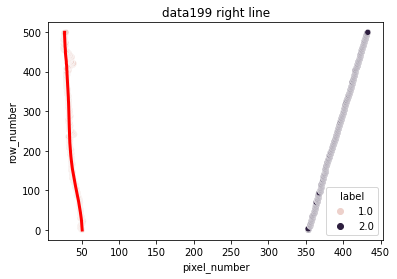

In [299]:
y_pred = svr_ae_model_left.predict(X)
sns.scatterplot(data=df_prev, x="pixel_number", y="row_number", hue="label")
plt.plot(y_pred, df_left['row_number'], color="red", linewidth=3)
plt.title("data199 right line")
plt.show()

In [300]:
df_left_now = df_now.loc[df_now.label == 1].copy()
X_now = df_left_now.iloc[:,[2,5]]

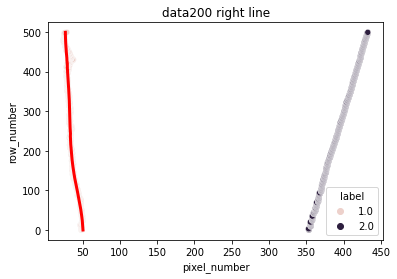

In [301]:
y_pred_now = svr_ae_model_left.predict(X_now)
sns.scatterplot(data=df_now, x="pixel_number", y="row_number", hue="label")
plt.plot(y_pred_now, df_left_now['row_number'], color="red", linewidth=3)
plt.title("data200 right line")
plt.show()

In [302]:
## Right Line model
df_right = df_prev.loc[df_prev.label == 2].copy()

X = df_right.iloc[:,[2,5]]
y = df_right.iloc[:,[3]]

In [303]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.3, random_state=42)

In [304]:
svr_ae_model_right = SVR(kernel="poly", C=4, epsilon=.2)
svr_ae_model_right.fit(X_train, y_train)
    
y_pred = svr_ae_model_right.predict(X_test)

print(f"R squarred : {r2_score(y_test, y_pred)}")
print(f"Adjusted R squarred : {1 - (1-r2_score(y_test, y_pred)) * (len(y)-1)/(len(y)-X.shape[1]-1)}")
print(f"Mean squarred error : {mean_squared_error(y_test, y_pred)}")
print(f"Mean Absolute Error : {mean_absolute_error(y_test, y_pred)}")
print(f"Training score : {svr_ae_model_right.score(X_train, y_train)}")

R squarred : 0.9997041026408533
Adjusted R squarred : 0.9997028948965303
Mean squarred error : 0.1803549080978715
Mean Absolute Error : 0.29325271004463266
Training score : 0.9996832123877679


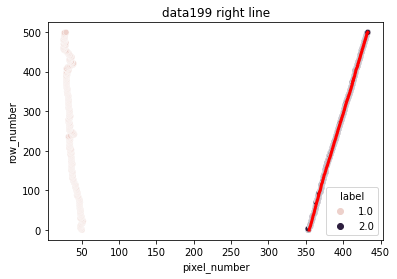

In [305]:
y_pred = svr_ae_model_right.predict(X)
sns.scatterplot(data=df_prev, x="pixel_number", y="row_number", hue="label")
plt.plot(y_pred, df_right['row_number'], color="red", linewidth=3)
plt.title("data199 right line")
plt.show()

In [306]:
df_right_now = df_now.loc[df_now.label == 2].copy()
X_now = df_right_now.iloc[:,[2,5]]

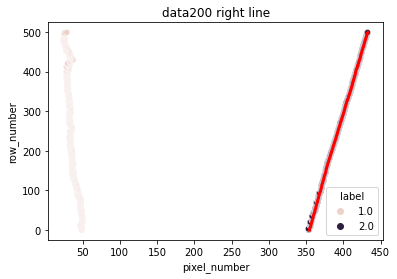

In [307]:
y_pred_now = svr_ae_model_right.predict(X_now)
sns.scatterplot(data=df_now, x="pixel_number", y="row_number", hue="label")
plt.plot(y_pred_now, df_right_now['row_number'], color="red", linewidth=3)
plt.title("data200 right line")
plt.show()

## DL regression:

In [353]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [354]:
## left Line model
df_left = df_prev.loc[df_prev.label == 1].copy()

X = df_left.iloc[:,[2,5]]
y = df_left.iloc[:,[3]]

In [355]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.3, random_state=42)

In [379]:
model_left = Sequential([
    Dense(2, input_dim=X.shape[1], activation="relu"),
#     Dropout(.2),
    Dense(1,activation="relu")
])

In [380]:
model_left.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_36 (Dense)            (None, 2)                 6         
                                                                 
 dense_37 (Dense)            (None, 1)                 3         
                                                                 
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


In [386]:
model_left.compile(optimizer=Adam(learning_rate=.1), loss="mean_absolute_error")

In [387]:
history = model_left.fit(X_train, y_train, epochs=20, verbose=1, validation_data=(X_test, y_test))

Epoch 1/20
11/11 [==============================] - 0s 9ms/step - loss: 8.9511 - val_loss: 4.0795
Epoch 2/20
11/11 [==============================] - 0s 3ms/step - loss: 3.8122 - val_loss: 4.2229
Epoch 3/20
11/11 [==============================] - 0s 3ms/step - loss: 2.5531 - val_loss: 1.6393
Epoch 4/20
11/11 [==============================] - 0s 3ms/step - loss: 1.3791 - val_loss: 1.1803
Epoch 5/20
11/11 [==============================] - 0s 3ms/step - loss: 1.6817 - val_loss: 2.2348
Epoch 6/20
11/11 [==============================] - 0s 3ms/step - loss: 1.6486 - val_loss: 1.3124
Epoch 7/20
11/11 [==============================] - 0s 3ms/step - loss: 1.4527 - val_loss: 2.0070
Epoch 8/20
11/11 [==============================] - 0s 3ms/step - loss: 1.3908 - val_loss: 1.3293
Epoch 9/20
11/11 [==============================] - 0s 3ms/step - loss: 1.1387 - val_loss: 0.9961
Epoch 10/20
11/11 [==============================] - 0s 3ms/step - loss: 1.5687 - val_loss: 1.0908
Epoch 11/20
11/11 [

In [393]:
def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.ylim([0, 10])
    plt.xlabel('Epoch')
    plt.ylabel('Error [Pixel_number]')
    plt.legend()
    plt.grid(True)

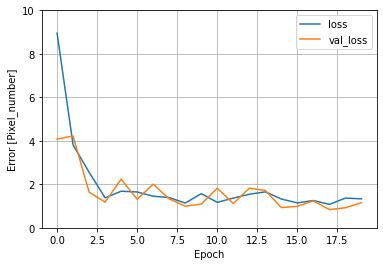

In [394]:
plot_loss(history)

In [395]:
y_pred = model_left.predict(X_test)
print(f"R squarred : {r2_score(y_test, y_pred)}")
print(f"Adjusted R squarred : {1 - (1-r2_score(y_test, y_pred)) * (len(y)-1)/(len(y)-X.shape[1]-1)}")
print(f"Mean squarred error : {mean_squared_error(y_test, y_pred)}")
print(f"Mean Absolute Error : {mean_absolute_error(y_test, y_pred)}")
print(f"Training score : {r2_score(y_train, model_left.predict(X_train))}")

5/5 [==============================] - 0s 1000us/step
R squarred : 0.946363429870527
Adjusted R squarred : 0.9461475885420382
Mean squarred error : 2.968230796713041
Mean Absolute Error : 1.154865674866977
11/11 [==============================] - 0s 700us/step
Training score : 0.9002075207531145


16/16 [==============================] - 0s 600us/step


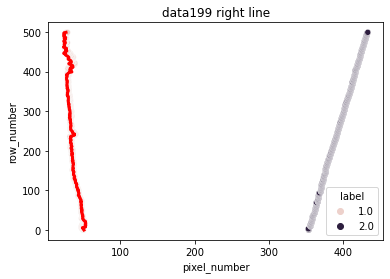

In [396]:
y_pred = model_left.predict(X)
sns.scatterplot(data=df_prev, x="pixel_number", y="row_number", hue="label")
plt.plot(y_pred, df_left['row_number'], color="red", linewidth=3)
plt.title("data199 right line")
plt.show()

In [397]:
df_left_now = df_now.loc[df_now.label == 1].copy()
X_now = df_left_now.iloc[:,[2,5]]

16/16 [==============================] - 0s 667us/step


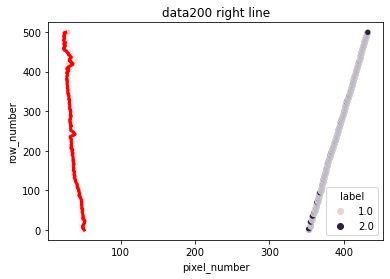

In [398]:
y_pred_now = model_left.predict(X_now)
sns.scatterplot(data=df_now, x="pixel_number", y="row_number", hue="label")
plt.plot(y_pred_now, df_left_now['row_number'], color="red", linewidth=3)
plt.title("data200 right line")
plt.show()

In [485]:
## Right Line model
df_right = df_prev.loc[df_prev.label == 2].copy()

X = df_right.iloc[:,[2,5]]
y = df_right.iloc[:,[3]]

In [486]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.3, random_state=42)

In [487]:
model_right = Sequential([
    Dense(2, input_dim=X.shape[1], activation="relu"),
    Dense(1,activation="relu")
])

In [488]:
model_right.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_57 (Dense)            (None, 2)                 6         
                                                                 
 dense_58 (Dense)            (None, 1)                 3         
                                                                 
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


In [497]:
model_right.compile(optimizer=Adam(learning_rate=.001), loss="mean_absolute_error")

In [498]:
history = model_right.fit(X_train, y_train, epochs=20, verbose=1, validation_data=(X_test, y_test))

Epoch 1/20
11/11 [==============================] - 0s 9ms/step - loss: 1.0505 - val_loss: 0.9828
Epoch 2/20
11/11 [==============================] - 0s 3ms/step - loss: 0.7061 - val_loss: 0.3268
Epoch 3/20
11/11 [==============================] - 0s 3ms/step - loss: 0.4865 - val_loss: 0.6015
Epoch 4/20
11/11 [==============================] - 0s 3ms/step - loss: 0.4385 - val_loss: 0.5233
Epoch 5/20
11/11 [==============================] - 0s 3ms/step - loss: 0.4002 - val_loss: 0.3230
Epoch 6/20
11/11 [==============================] - 0s 3ms/step - loss: 0.3265 - val_loss: 0.3518
Epoch 7/20
11/11 [==============================] - 0s 3ms/step - loss: 0.3030 - val_loss: 0.3572
Epoch 8/20
11/11 [==============================] - 0s 2ms/step - loss: 0.3200 - val_loss: 0.3192
Epoch 9/20
11/11 [==============================] - 0s 3ms/step - loss: 0.3237 - val_loss: 0.3734
Epoch 10/20
11/11 [==============================] - 0s 2ms/step - loss: 0.3114 - val_loss: 0.3625
Epoch 11/20
11/11 [

In [499]:
def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.ylim([0, 10])
    plt.xlabel('Epoch')
    plt.ylabel('Error [Pixel_number]')
    plt.legend()
    plt.grid(True)

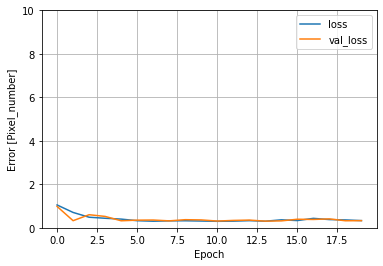

In [500]:
plot_loss(history)

In [501]:
y_pred = model_right.predict(X_test)
print(f"R squarred : {r2_score(y_test, y_pred)}")
print(f"Adjusted R squarred : {1 - (1-r2_score(y_test, y_pred)) * (len(y)-1)/(len(y)-X.shape[1]-1)}")
print(f"Mean squarred error : {mean_squared_error(y_test, y_pred)}")
print(f"Mean Absolute Error : {mean_absolute_error(y_test, y_pred)}")
print(f"Training score : {r2_score(y_train, model_right.predict(X_train))}")

5/5 [==============================] - 0s 751us/step
R squarred : 0.9995425393235872
Adjusted R squarred : 0.9995406721371528
Mean squarred error : 0.27883073539674486
Mean Absolute Error : 0.32891495163376266
11/11 [==============================] - 0s 700us/step
Training score : 0.9995209859647379


16/16 [==============================] - 0s 733us/step


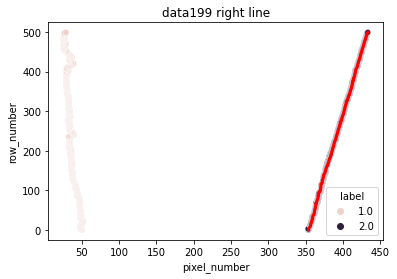

In [502]:
y_pred = model_right.predict(X)
sns.scatterplot(data=df_prev, x="pixel_number", y="row_number", hue="label")
plt.plot(y_pred, df_right['row_number'], color="red", linewidth=3)
plt.title("data199 right line")
plt.show()

In [503]:
df_right_now = df_now.loc[df_now.label == 2].copy()
X_now = df_right_now.iloc[:,[2,5]]

16/16 [==============================] - 0s 667us/step


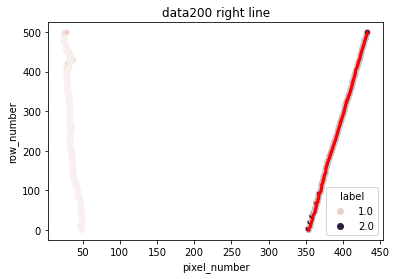

In [504]:
y_pred_now = model_right.predict(X_now)
sns.scatterplot(data=df_now, x="pixel_number", y="row_number", hue="label")
plt.plot(y_pred_now, df_right_now['row_number'], color="red", linewidth=3)
plt.title("data200 right line")
plt.show()